In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from io import StringIO
from IPython.display import display, HTML
%matplotlib inline
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})

|key            | explanation                                     |
|-----------------------------------------------------------------|
|survival       | Survival    (0 = No; 1 = Yes)                   |
|pclass         | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower   |
|name           | Name                                            |
|sex            | Sex                                             |
|age            | Age in years, Fractional if Age less than One, If the Age is Estimated, it is in the form xx.5                                           |
|sibsp          | Number of Siblings/Spouses Aboard  Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)             |
|parch          | Number of Parents/Children Aboard Parent:   Mother or Father of Passenger Aboard Titanic Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic Some children travelled only with a nanny, therefore parch=0 for them. |
|ticket         | Ticket Number                                   |
|fare           | Passenger Fare                                  |
|cabin          | Cabin                                           |
|embarked       | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

In [22]:
column_types = {
    'PassengerId': 'int32',
    'Pclass': 'category',
    'Sex': 'category',
    'Age': 'float32',
    'SibSp': 'int8',
    'Parch': 'int8',
    'Fare': 'Float64',
    'Embarked': 'category',
    'Survived': 'category'
}
train = pd.read_csv('data/train.csv', dtype=column_types)


# move survived to the end
def move_to_end(col_name, df):
    cols = list(df)
    cols.append(cols.pop(cols.index(col_name)))
    return df.ix[:, cols]


train = move_to_end('Ticket', train)
train = move_to_end('Name', train)
train = move_to_end('Survived', train)

test = pd.read_csv('data/test.csv', dtype=column_types)
test = move_to_end('Ticket', test)
test = move_to_end('Name', test)

train.Survived.cat.rename_categories(['No', 'Yes'], inplace=True)
train.Embarked.cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)
test.Embarked.cat.rename_categories(['Cherbourg', 'Queenstown', 'Southampton'], inplace=True)

In [23]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,40.2 KiB
Average record size in memory,46.2 B
Numeric,5
Categorical,6
Date,0
Text (Unique),1
Rejected,0
Distinct count,89


In [13]:
display(train.head()), display(test.head()) 

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket,Name,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,A/5 21171,"Braund, Mr. Owen Harris",0
1,2,1,female,38.0,1,0,71.2833,C85,C,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,3,female,26.0,0,0,7.9250,NaN,S,STON/O2. 3101282,"Heikkinen, Miss. Laina",1
3,4,1,female,35.0,1,0,53.1000,C123,S,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,5,3,male,35.0,0,0,8.0500,NaN,S,373450,"Allen, Mr. William Henry",0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket,Name
0,892,3,male,34.5,0,0,7.8292,NaN,Q,330911,"Kelly, Mr. James"
1,893,3,female,47.0,1,0,7.0000,NaN,S,363272,"Wilkes, Mrs. James (Ellen Needs)"
2,894,2,male,62.0,0,0,9.6875,NaN,Q,240276,"Myles, Mr. Thomas Francis"
3,895,3,male,27.0,0,0,8.6625,NaN,S,315154,"Wirz, Mr. Albert"
4,896,3,female,22.0,1,1,12.2875,NaN,S,3101298,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)"


(None, None)

In [14]:
train.groupby('Pclass')['Age', 'Fare', 'Survived'].mean()

,Age,Fare,Survived
Pclass,,,
1,38.233441,84.154687,0.629630
2,29.877630,20.662183,0.472826
3,25.140620,13.675550,0.242363


In [15]:

corr_type = ['pearson', 'kendall', 'spearman']
c = pd.DataFrame( train.corr(method=i)['Survived'] for i in corr_type)
c.index = corr_type
display(c.transpose().corr())
display(c.transpose().reset_index())

,pearson,kendall,spearman
pearson,1.000000,0.995075,0.993908
kendall,0.995075,1.000000,0.998475
spearman,0.993908,0.998475,1.000000


,index,pearson,kendall,spearman
0,PassengerId,-0.005007,-0.004090,-0.005007
1,Pclass,-0.338481,-0.323533,-0.339668
2,Age,-0.077221,-0.043385,-0.052565
3,SibSp,-0.035322,0.085915,0.088879
4,Parch,0.081629,0.133933,0.138266
5,Fare,0.257307,0.266229,0.323736
6,Survived,1.000000,1.000000,1.000000


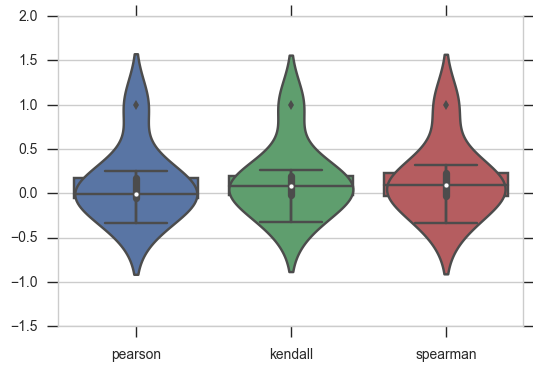

In [16]:
sns.boxplot(data=c.transpose()); sns.violinplot(data=c.transpose())

In [27]:
from sklearn.svm import SVC
display(train.head())
display(train['Pclass'].head())
SVC(kernel='linear', C=1).fit(train, test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket,Name,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,A/5 21171,"Braund, Mr. Owen Harris",0
1,2,1,female,38.0,1,0,71.2833,C85,C,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,3,female,26.0,0,0,7.9250,NaN,S,STON/O2. 3101282,"Heikkinen, Miss. Laina",1
3,4,1,female,35.0,1,0,53.1000,C123,S,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,5,3,male,35.0,0,0,8.0500,NaN,S,373450,"Allen, Mr. William Henry",0


0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

ValueError: could not convert string to float: 'Dooley, Mr. Patrick'